# Forecasting the Sales of a Furniture store

# 1.Import packages

In [3]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import itertools

# 2.Set options

In [4]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

# 3.Read data

In [5]:
data=pd.read_csv("E:\data science\Projects\Sales_Forecasting(time_series)\Dataset\Super_Store.csv",encoding='cp1252')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [6]:
data.shape

(2121, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [8]:
df=data.copy()
df.shape

(2121, 21)

# 4.Understanding data 

In [9]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [10]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

#### Statistical Summary


In [11]:
#stats for continous features
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [12]:
#stats for categorical features

data.describe(include="object")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121
unique,1764,889,960,4,707,707,3,1,371,48,4,375,1,4,380
top,US-2015-129007,9/5/2016,12/6/2017,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,California,West,FUR-FU-10004270,Furniture,Furnishings,KI Adjustable-Height Table
freq,4,10,10,1248,15,15,1113,2121,192,444,707,16,2121,957,18


#### Check for missing values

In [13]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

No missing values in the data

#### Data manipulation

In [14]:
df['Order Date'].max(), df['Order Date'].min()

(Timestamp('2017-12-30 00:00:00'), Timestamp('2014-01-06 00:00:00'))

We have sales data from jan 2014 to dec 2017 .ie 4 years

In [15]:
#dropping irrelevant columns
furniture=df[['Order Date', 'Sales']]
furniture=furniture.groupby(['Order Date'])['Sales'].sum().reset_index()
furniture.sort_values('Order Date')

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
5,2014-01-14,61.9600
6,2014-01-16,127.1040
7,2014-01-19,181.4700
8,2014-01-20,1413.5100
9,2014-01-21,25.2480


In [16]:
furniture.set_index('Order Date', inplace =True)

# 5.Time Series Analysis

    1.Visualizing
    2.Sampling
    3.Stationarity
    4..Decomposition
    

#### Visualizing

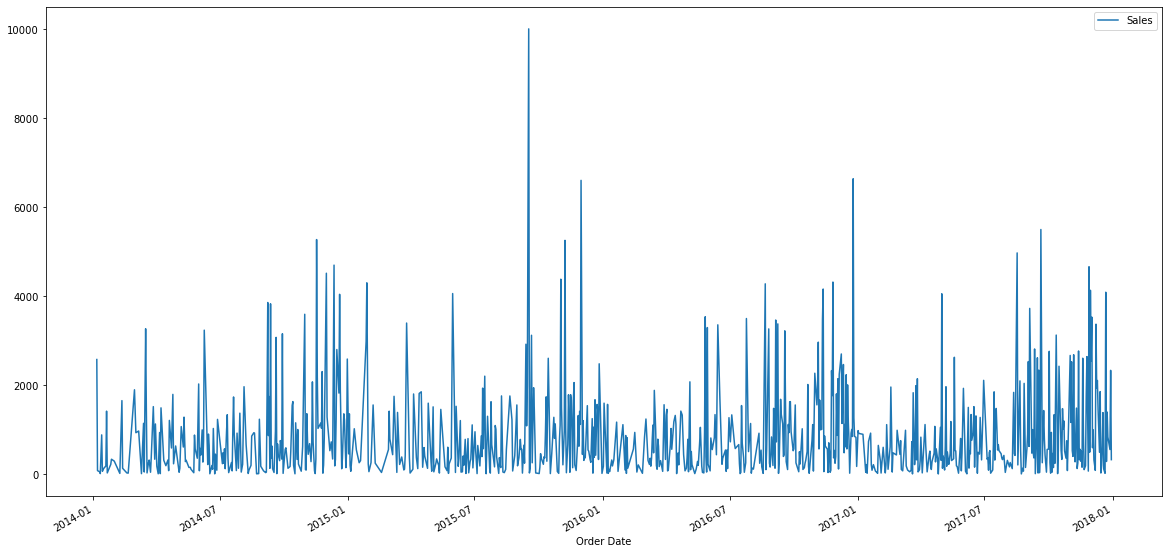

In [17]:
furniture.plot(figsize=(20,10))

#### Sampling & Decomposing

In [18]:
y=furniture['Sales'].resample('MS').sum()
y

Order Date
2014-01-01     6242.5250
2014-02-01     1839.6580
2014-03-01    14573.9560
2014-04-01     7944.8370
2014-05-01     6912.7870
2014-06-01    13206.1256
2014-07-01    10821.0510
2014-08-01     7320.3465
2014-09-01    23816.4808
2014-10-01    12304.2470
2014-11-01    21564.8727
2014-12-01    30645.9665
2015-01-01    11739.9416
2015-02-01     3134.3740
2015-03-01    12499.7830
2015-04-01    10475.6985
2015-05-01     9374.9505
2015-06-01     7714.1790
2015-07-01    13674.4200
2015-08-01     9638.5922
2015-09-01    26273.0230
2015-10-01    12026.6235
2015-11-01    30880.8325
2015-12-01    23085.8192
2016-01-01     7622.7430
2016-02-01     3925.5510
2016-03-01    12801.0920
2016-04-01    13212.0900
2016-05-01    15119.8350
2016-06-01    13070.5720
2016-07-01    13068.5190
2016-08-01    12483.2323
2016-09-01    27262.8809
2016-10-01    11872.5770
2016-11-01    31783.6288
2016-12-01    36678.7150
2017-01-01     5964.0320
2017-02-01     6866.3374
2017-03-01    10893.4448
2017-04-01    

In [19]:
type(y)

pandas.core.series.Series

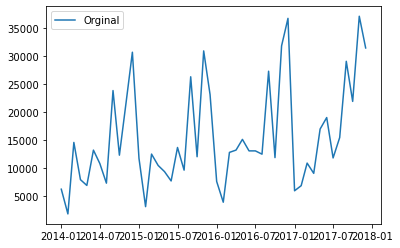

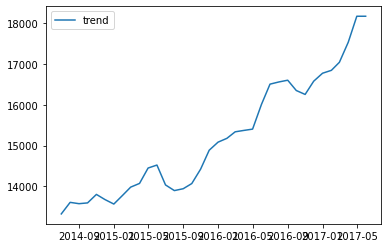

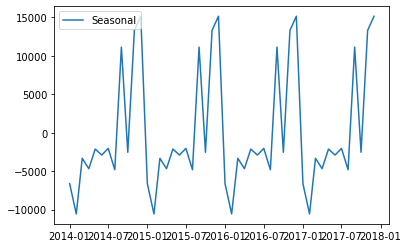

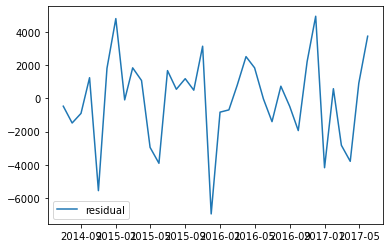

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(y)

plt.plot(y, label="Orginal")
plt.legend()
plt.show()


trend=decomposition.trend
plt.plot(trend, label="trend")
plt.legend()
plt.show()

seasonal=decomposition.seasonal
plt.plot(seasonal, label="Seasonal")
plt.legend()
plt.show()

residual=decomposition.resid
plt.plot(residual, label="residual")
plt.legend()
plt.show()

Plots clearly indicates that the time series has seasonally pattern and also shows increasing trend

#### Check for stationarity
    Using adafuller test
    Null-hypothesis=the data is not stationary
    Alternative-hypothesis=the data is stationary

In [21]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(y)
print("P-value : ",result[1])

P-value :  8.450793985809671e-05


Since p-value is <0.05, we reject null hypothesis and can  conclude that data is stationary

# 5.Time series forecasting using ARIMAX

In [22]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [23]:
seasonal_pdq=[]
for i in pdq:
    val=(i[0], i[1], i[2], 12)
    seasonal_pdq.append(val)
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

#### Parameter selection

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
for param in pdq:
    for seasonal in seasonal_pdq:
        try:
            mod=SARIMAX(y, order=param, seasonal_order=seasonal)
            results=mod.fit()
            print(f"ARIMA : {param} * SARIMA :{seasonal} with AIC : {results.aic} ")
            
        except:
            continue
                  

ARIMA : (0, 0, 0) * SARIMA :(0, 0, 0, 12) with AIC : 1078.25888197625 
ARIMA : (0, 0, 0) * SARIMA :(0, 0, 1, 12) with AIC : 1045.3787846796995 
ARIMA : (0, 0, 0) * SARIMA :(0, 1, 0, 12) with AIC : 711.5292879002074 
ARIMA : (0, 0, 0) * SARIMA :(0, 1, 1, 12) with AIC : 713.8871368377828 
ARIMA : (0, 0, 0) * SARIMA :(1, 0, 0, 12) with AIC : 982.2455258725095 


C:\Users\Reby Varghese\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Reby Varghese\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA : (0, 0, 0) * SARIMA :(1, 0, 1, 12) with AIC : 982.8507408483649 
ARIMA : (0, 0, 0) * SARIMA :(1, 1, 0, 12) with AIC : 713.4200494282586 
ARIMA : (0, 0, 0) * SARIMA :(1, 1, 1, 12) with AIC : 714.0325380349133 
ARIMA : (0, 0, 1) * SARIMA :(0, 0, 0, 12) with AIC : 1059.367274937735 
ARIMA : (0, 0, 1) * SARIMA :(0, 0, 1, 12) with AIC : 1053.0746436585923 
ARIMA : (0, 0, 1) * SARIMA :(0, 1, 0, 12) with AIC : 712.7790106247766 
ARIMA : (0, 0, 1) * SARIMA :(0, 1, 1, 12) with AIC : 714.4986038895157 
ARIMA : (0, 0, 1) * SARIMA :(1, 0, 0, 12) with AIC : 1049.5051120629757 
ARIMA : (0, 0, 1) * SARIMA :(1, 0, 1, 12) with AIC : 1051.25861479079 
ARIMA : (0, 0, 1) * SARIMA :(1, 1, 0, 12) with AIC : 714.3827137353884 
ARIMA : (0, 0, 1) * SARIMA :(1, 1, 1, 12) with AIC : 714.6949354948599 
ARIMA : (0, 1, 0) * SARIMA :(0, 0, 0, 12) with AIC : 1005.3736412641732 
ARIMA : (0, 1, 0) * SARIMA :(0, 0, 1, 12) with AIC : 992.4356249297373 
ARIMA : (0, 1, 0) * SARIMA :(0, 1, 0, 12) with AIC : 714.99745

C:\Users\Reby Varghese\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA : (0, 1, 0) * SARIMA :(1, 0, 1, 12) with AIC : 1040.0983676830324 
ARIMA : (0, 1, 0) * SARIMA :(1, 1, 0, 12) with AIC : 713.4941299842154 


C:\Users\Reby Varghese\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA : (0, 1, 0) * SARIMA :(1, 1, 1, 12) with AIC : 711.5026091351975 
ARIMA : (0, 1, 1) * SARIMA :(0, 0, 0, 12) with AIC : 994.2446376704141 
ARIMA : (0, 1, 1) * SARIMA :(0, 0, 1, 12) with AIC : 981.6348022719383 
ARIMA : (0, 1, 1) * SARIMA :(0, 1, 0, 12) with AIC : 711.3983143949392 
ARIMA : (0, 1, 1) * SARIMA :(0, 1, 1, 12) with AIC : 710.5456269476482 
ARIMA : (0, 1, 1) * SARIMA :(1, 0, 0, 12) with AIC : 968.1204696207802 
ARIMA : (0, 1, 1) * SARIMA :(1, 0, 1, 12) with AIC : 982.7105474762682 
ARIMA : (0, 1, 1) * SARIMA :(1, 1, 0, 12) with AIC : 709.3634612927142 
ARIMA : (0, 1, 1) * SARIMA :(1, 1, 1, 12) with AIC : 708.1305790595698 
ARIMA : (1, 0, 0) * SARIMA :(0, 0, 0, 12) with AIC : 1026.1291342571371 
ARIMA : (1, 0, 0) * SARIMA :(0, 0, 1, 12) with AIC : 1013.4893645766489 
ARIMA : (1, 0, 0) * SARIMA :(0, 1, 0, 12) with AIC : 712.5992604203815 
ARIMA : (1, 0, 0) * SARIMA :(0, 1, 1, 12) with AIC : 714.2458305710726 
ARIMA : (1, 0, 0) * SARIMA :(1, 0, 0, 12) with AIC : 979.53454

C:\Users\Reby Varghese\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA : (1, 0, 1) * SARIMA :(0, 0, 1, 12) with AIC : 1006.4656557666785 
ARIMA : (1, 0, 1) * SARIMA :(0, 1, 0, 12) with AIC : 711.120735784911 


C:\Users\Reby Varghese\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Reby Varghese\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA : (1, 0, 1) * SARIMA :(0, 1, 1, 12) with AIC : 710.3733339766147 
ARIMA : (1, 0, 1) * SARIMA :(1, 0, 0, 12) with AIC : 973.6485682127088 
ARIMA : (1, 0, 1) * SARIMA :(1, 0, 1, 12) with AIC : 974.8907301953394 
ARIMA : (1, 0, 1) * SARIMA :(1, 1, 0, 12) with AIC : 710.3846416623952 
ARIMA : (1, 0, 1) * SARIMA :(1, 1, 1, 12) with AIC : 711.4982403258317 
ARIMA : (1, 1, 0) * SARIMA :(0, 0, 0, 12) with AIC : 999.1166037056392 
ARIMA : (1, 1, 0) * SARIMA :(0, 0, 1, 12) with AIC : 990.135933588496 
ARIMA : (1, 1, 0) * SARIMA :(0, 1, 0, 12) with AIC : 713.180780609913 
ARIMA : (1, 1, 0) * SARIMA :(0, 1, 1, 12) with AIC : 712.1608097665992 
ARIMA : (1, 1, 0) * SARIMA :(1, 0, 0, 12) with AIC : 974.7378628283844 
ARIMA : (1, 1, 0) * SARIMA :(1, 0, 1, 12) with AIC : 986.008390732561 
ARIMA : (1, 1, 0) * SARIMA :(1, 1, 0, 12) with AIC : 711.1441203937904 
ARIMA : (1, 1, 0) * SARIMA :(1, 1, 1, 12) with AIC : 710.3297086531938 
ARIMA : (1, 1, 1) * SARIMA :(0, 0, 0, 12) with AIC : 994.7447798913

C:\Users\Reby Varghese\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA : (1, 1, 1) * SARIMA :(1, 0, 1, 12) with AIC : 970.3002621825669 
ARIMA : (1, 1, 1) * SARIMA :(1, 1, 0, 12) with AIC : 708.4278174926208 
ARIMA : (1, 1, 1) * SARIMA :(1, 1, 1, 12) with AIC : 707.9043871686619 


In [27]:
#Fitting the sarima model

mod=SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12))
results=mod.fit()
results.summary()

C:\Users\Reby Varghese\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -348.952
Date:                            Tue, 04 Jan 2022   AIC                            707.904
Time:                                    03:26:10   BIC                            715.681
Sample:                                01-01-2014   HQIC                           710.589
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4362      0.172      2.529      0.011       0.098       0.774
ma.L1         -0.8722      0.143     -6.115      0.000      -1.152      -0.593
ar.S.L12      -0.9438      0.413     -2.284      0.022      -1.754      -0.134
ma.S.L12       0.8142      0.764      1.066      0.287      -0.683       2.312
sigma2      2.809e+07   5.45e-08   5.15e+14      0.000    2.81e+07    2.81e+07
===================================================================================
Ljung-Box (Q):                       40.81   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.20   Prob(JB):                         0.71
Heteroskedasticity (H):               0.58   Skew:                             0.17
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.6e+30. Standard errors may be unstable.
"""

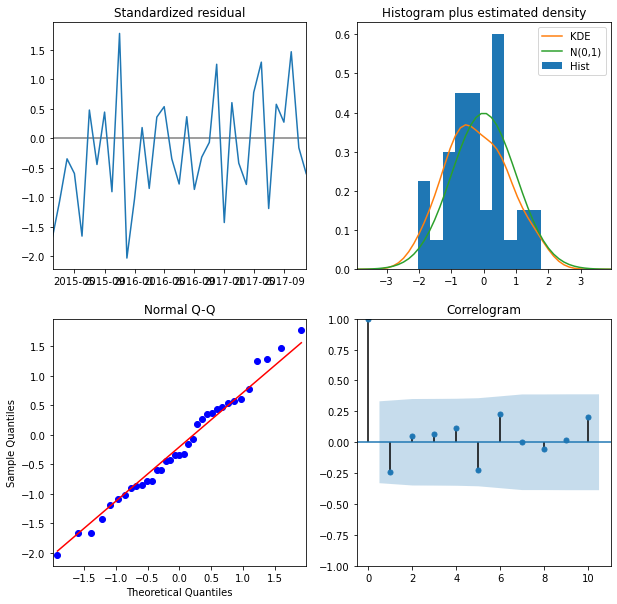

In [32]:
results.plot_diagnostics(figsize=(10,10))
plt.show()

# 6. Validarting forecast

C:\Users\Reby Varghese\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0, 0.5, 'Furniture Sales')

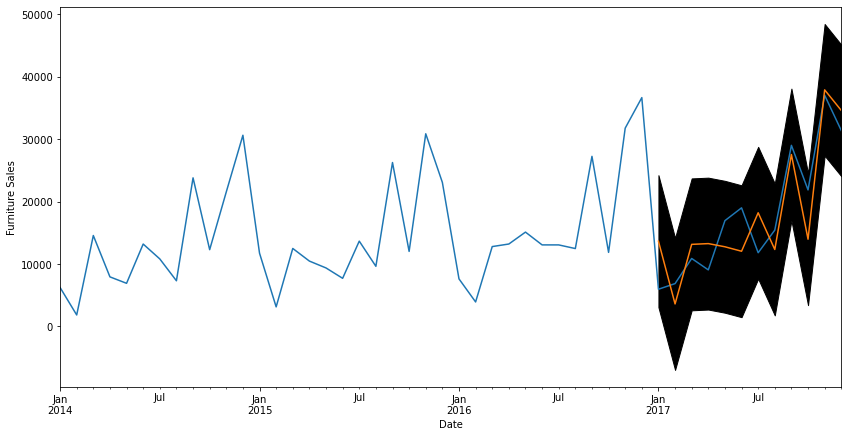

In [79]:
#one step ahad forecast


pred=results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci=pred.conf_int()
ax=y.plot()
pred.predicted_mean.plot(ax=ax, figsize=(14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

In [51]:
pred_ci

,lower Sales,upper Sales
Order Date,,
2017-01-01,3079.095954,24245.804027
2017-02-01,-6966.659182,14180.601942
2017-03-01,2584.461933,23727.718133
2017-04-01,2706.446512,23846.840761
2017-05-01,2199.585898,23337.909622
2017-06-01,1484.457010,22621.241913
2017-07-01,7651.573276,28787.140813
2017-08-01,1768.148874,22902.603386
2017-09-01,16984.366708,38117.439448


C:\Users\Reby Varghese\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0, 0.5, 'Furniture Sales')

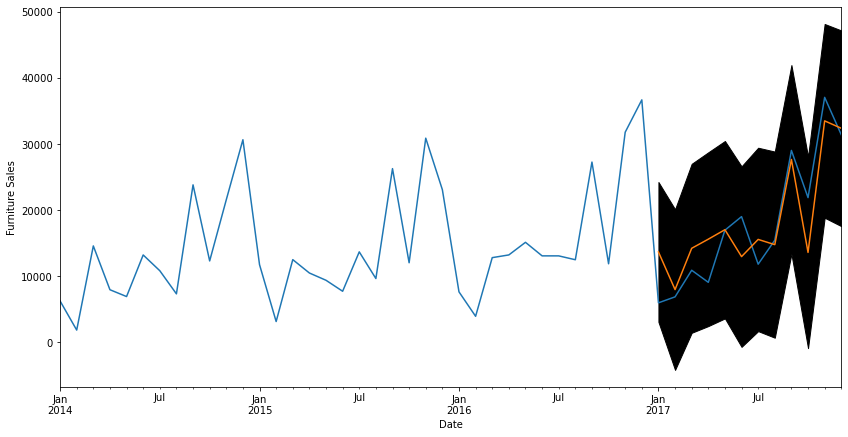

In [78]:
#out of sample forecast

pred=results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=True)
pred_ci=pred.conf_int()
ax=y.plot()
pred.predicted_mean.plot(ax=ax, figsize=(14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

# 7.Calculating RMSE AND MSE

In [61]:
y_pred=pred.predicted_mean
y_truth=y['2017-01-01':]
mse=((y_pred-y_truth)**2).mean()
rmse=np.sqrt(mse)
print(f"MSE : {mse} & RMSE : {rmse}" )

MSE : 20791232.545704473 & RMSE : 4559.740403323908


# 8.Visualize the forecast

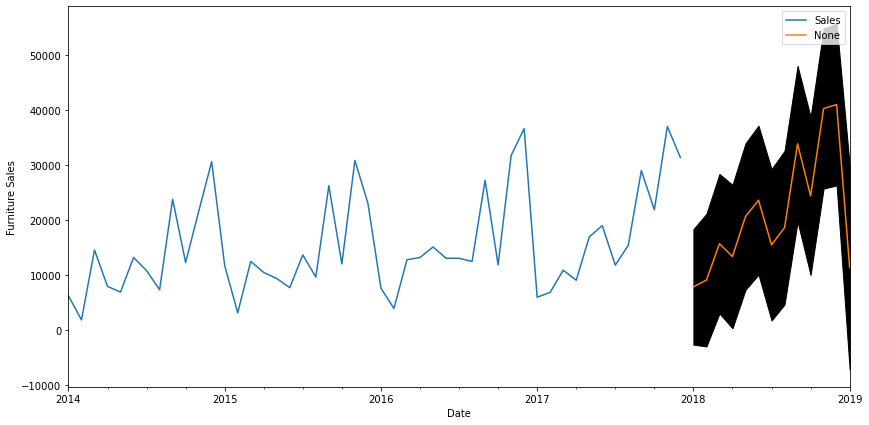

In [75]:
pred_uc=results.get_forecast(steps=13)
pred_ic=pred_uc.conf_int()
ax=y.plot(figsize=(14,7))
pred_uc.predicted_mean.plot()
ax.fill_between(pred_ic.index,
                pred_ic.iloc[:, 0],
                pred_ic.iloc[:, 1], color='k')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()